**NOTE: I definitely could have looped everything to make the code look much nicer or use functions to avoid redunduncy, sorry about that**

**This is The 4Lab of DataMining**

This is the improved version of the LAB4 assignemnts - use of functions to make it more efficient and readable

In [1]:
#importing necessary librairies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import DBSCAN

# Assignment 1

## a) Generation of 4 Gaussian Clusters

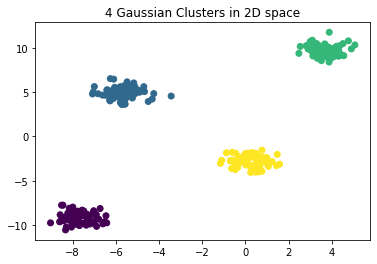

In [2]:
n_samples = 300
n_features = n_samples//4
centers = 4
cluster_std = 0.6
center_box = (-10, 10) #same as default (not necessary)
shuffle = True #default so no need

X, y = make_blobs(n_samples = n_samples, n_features = n_features, centers = centers, cluster_std = cluster_std, center_box = center_box) 


#plot to show what it looks like:
Xx = X[:, 0]
Xy = X[:, 1]
plt.scatter(Xx, Xy, c=y, cmap='viridis') #varidis shows the different clusters with different colors 

plt.title('4 Gaussian Clusters in 2D space')

plt.savefig('4 Gaussian Clusters in 2D space')
plt.show()

In [3]:
#help(sklearn.datasets.make_blobs)

## b) Running K-Mean

In [4]:
k = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

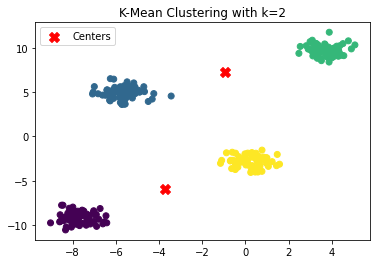

Contingency Table for k=2
[[75  0]
 [ 0 75]
 [ 0 75]
 [75  0]]


In [5]:
##test for 1
kmeans = KMeans(n_clusters=2, random_state=None)
Ypred = kmeans.fit(X)

plt.scatter(Xx, Xy, c=y, cmap='viridis') #plot original
plt.scatter(Ypred.cluster_centers_[:, 0], Ypred.cluster_centers_[:, 1], marker='X', c='red',s = 100, label='Centers')

plt.title('K-Mean Clustering with k=2')
plt.legend()
plt.show()

#print contigency matrix

CM = contingency_matrix(y, kmeans.labels_)
    
print('Contingency Table for k=2')
print(CM)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Contingency Table for k=1
[[75]
 [75]
 [75]
 [75]]


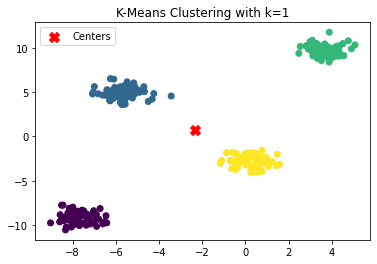

Contingency Table for k=2
[[75  0]
 [ 0 75]
 [ 0 75]
 [75  0]]


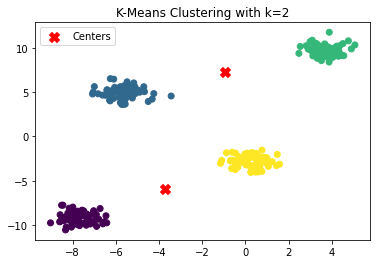

Contingency Table for k=3
[[ 0  0 75]
 [75  0  0]
 [75  0  0]
 [ 0 75  0]]


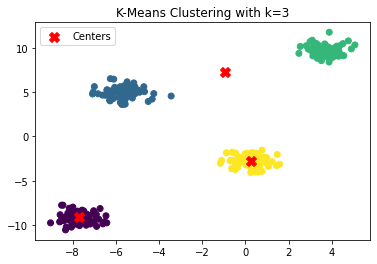

Contingency Table for k=4
[[75  0  0  0]
 [ 0 75  0  0]
 [ 0  0  0 75]
 [ 0  0 75  0]]


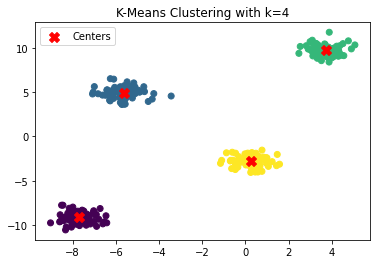

Contingency Table for k=5
[[ 0  0  0 75  0]
 [ 0  0 39  0 36]
 [75  0  0  0  0]
 [ 0 75  0  0  0]]


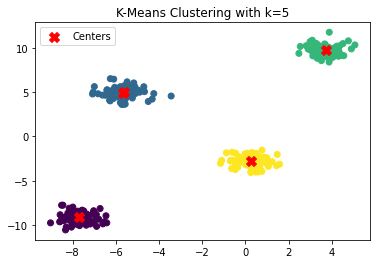

Contingency Table for k=6
[[ 0  0 45  0  0 30]
 [ 0  0  0 75  0  0]
 [23  0  0  0 52  0]
 [ 0 75  0  0  0  0]]


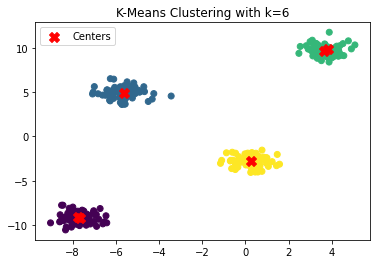

Contingency Table for k=7
[[ 0  0 23  0  0 22 30]
 [ 0  0  0 75  0  0  0]
 [23  0  0  0 52  0  0]
 [ 0 75  0  0  0  0  0]]


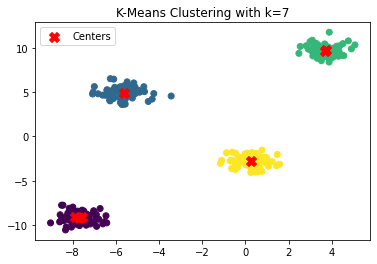

Contingency Table for k=8
[[ 0 30  0  0  0 45  0  0]
 [ 0  0  0 46  0  0  0 29]
 [40  0  0  0  0  0 35  0]
 [ 0  0 31  0 44  0  0  0]]


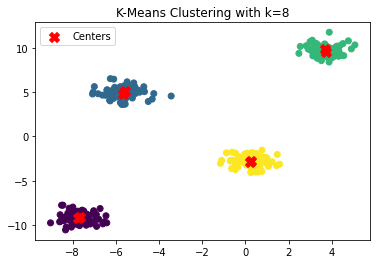

Contingency Table for k=9
[[27  0  0  0 12 36  0  0  0]
 [ 0  0  0 42  0  0  0 33  0]
 [ 0 41  0  0  0  0 34  0  0]
 [ 0  0 42  0  0  0  0  0 33]]


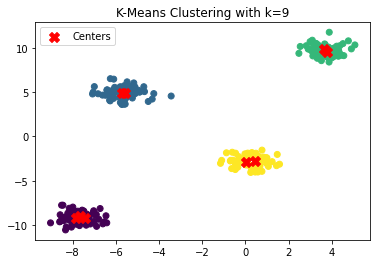

Contingency Table for k=10
[[ 0 14  0  0  0 23  0  0 38  0]
 [24  0  0  0 18  0  0  0  0 33]
 [ 0  0  0 75  0  0  0  0  0  0]
 [ 0  0 25  0  0  0 36 14  0  0]]


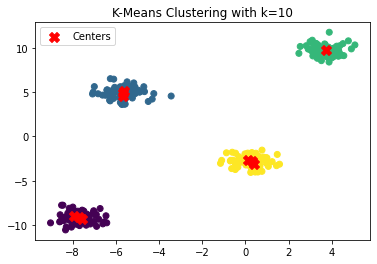

In [6]:
##Test for all
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=None)
    Ypred = kmeans.fit(X)
    
    plt.scatter(Xx, Xy, c=y, cmap='viridis') 
    plt.scatter(Ypred.cluster_centers_[:, 0], Ypred.cluster_centers_[:, 1], marker='X', c='red',s = 100, label='Centers')
    
    plt.title(f'K-Means Clustering with k={i}')
    plt.legend()

    #print contigency matrix
    CM = contingency_matrix(y, kmeans.labels_)
    print(f'Contingency Table for k={i}')
    print(CM)
    
    plt.savefig(f'K-Means Clustering with k={i}')
    plt.show()


## c) Plot SSE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


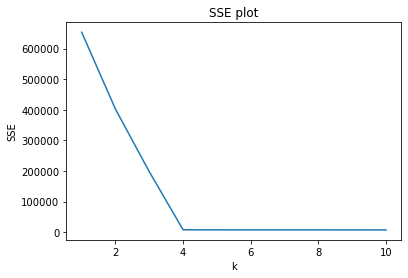

In [7]:
#Let's plot SSE using a for loop

sse = [] #initiate sse variable

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=None)
    Ypred = kmeans.fit(X)
    sse.append(Ypred.inertia_) #intertia and sse is //
    
plt.plot(k, sse)
plt.title('SSE plot')
plt.xlabel('k')
plt.ylabel('SSE')

plt.savefig('SSE plot')
plt.show()

To answer the question : *Does the plot indicate that the natural number of clusters is 4?*  
The answer is **yes**  
Elbow Method clearly shows that 4 is the correct number of clusters


## d) and e) Repeat of a)-c) with different stdev and cluster center initialization

In order to make everything run smoother and more efficiently, I will introduce functions and loops when possible so that I do not have to run identical/similar cells

In [8]:
#Create a function for the cluster generations: 

def generate_clusters(std):
    n_samples = 300
    n_features = n_samples//4
    centers = 4
    cluster_std = std
    center_box = (-10, 10) #same as default (not necessary)
    shuffle = True #default so no need

    X, y = make_blobs(n_samples = n_samples, n_features = n_features, centers = centers, cluster_std = cluster_std, center_box = center_box) 

    return X, y

In [9]:
#create function to plot the clusters and avoir redunduncy

def plot_clusters(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis') #varidis shows the different clusters with different colors 
    plt.title(title)
    plt.savefig(title + '.png')
    plt.show() 

In [10]:
#Create function for the kmeans clustering

def kmeans_clustering(X, y, k, title, random_state=None):
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    Ypred = kmeans.fit(X)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.scatter(Ypred.cluster_centers_[:, 0], Ypred.cluster_centers_[:, 1], marker='X', c='red', s=50, label='Centers')

    plt.title(title)
    plt.legend()
    plt.savefig(title +'.png')
    plt.show()

    CM = contingency_matrix(y, kmeans.labels_)
    print(f'Contingency Table for k={k}')
    print(CM)

In [11]:
#Create function for the SSE plotting

def plot_sse(k, sse_values, title):
    plt.plot(k, sse_values)
    plt.title(title)
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.savefig(title +'.png')
    plt.show()

### Generation of all plots with different std and cluster center initialization

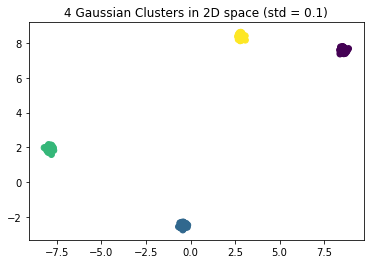

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


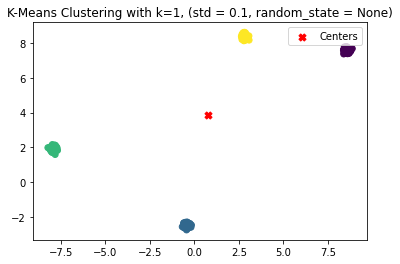

Contingency Table for k=1
[[75]
 [75]
 [75]
 [75]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


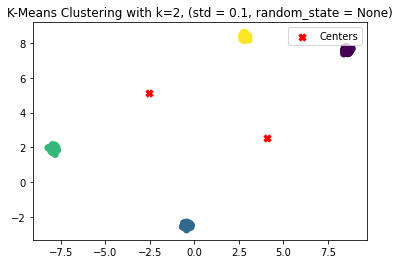

Contingency Table for k=2
[[ 0 75]
 [ 0 75]
 [75  0]
 [75  0]]


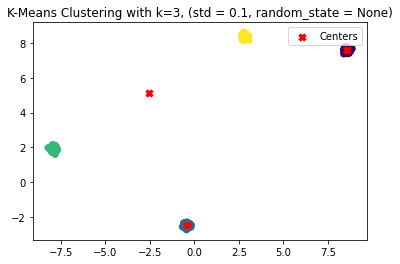

Contingency Table for k=3
[[75  0  0]
 [ 0  0 75]
 [ 0 75  0]
 [ 0 75  0]]


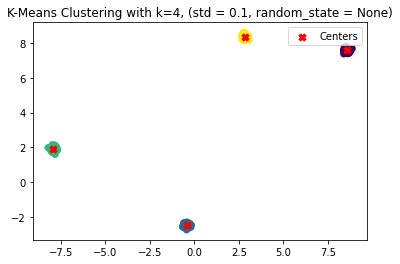

Contingency Table for k=4
[[ 0  0 75  0]
 [ 0 75  0  0]
 [75  0  0  0]
 [ 0  0  0 75]]


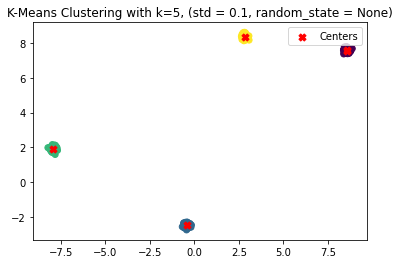

Contingency Table for k=5
[[ 0  0 47  0 28]
 [75  0  0  0  0]
 [ 0  0  0 75  0]
 [ 0 75  0  0  0]]


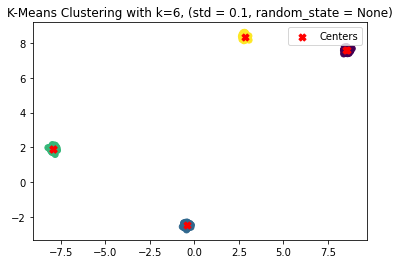

Contingency Table for k=6
[[ 0  0 33  0  0 42]
 [75  0  0  0  0  0]
 [ 0 27  0  0 48  0]
 [ 0  0  0 75  0  0]]


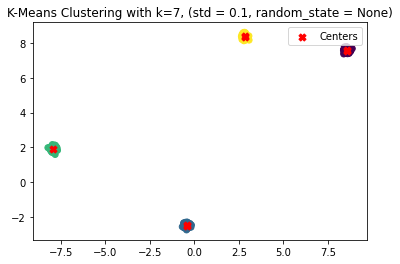

Contingency Table for k=7
[[ 0  0 32  0  0 43  0]
 [37  0  0  0  0  0 38]
 [ 0 75  0  0  0  0  0]
 [ 0  0  0 35 40  0  0]]


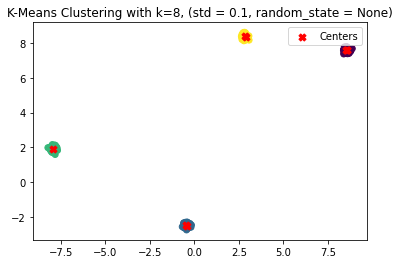

Contingency Table for k=8
[[ 0  0 31  0  0  0 16 28]
 [29  0  0  0 46  0  0  0]
 [ 0  0  0 75  0  0  0  0]
 [ 0 25  0  0  0 50  0  0]]


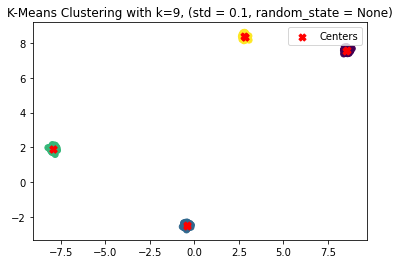

Contingency Table for k=9
[[ 0 45  0  0  0  0  0 30  0]
 [ 0  0  0 32  0  0  0  0 43]
 [ 0  0 35  0  0 40  0  0  0]
 [20  0  0  0  7  0 48  0  0]]


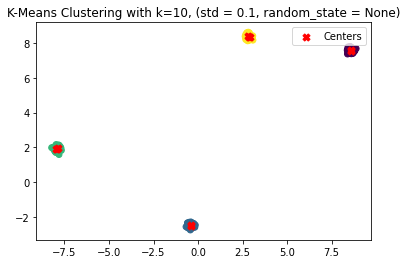

Contingency Table for k=10
[[18  0  0  0 57  0  0  0  0  0]
 [ 0  0 30  0  0  0  0 45  0  0]
 [ 0 17  0  0  0 17 41  0  0  0]
 [ 0  0  0 34  0  0  0  0 14 27]]


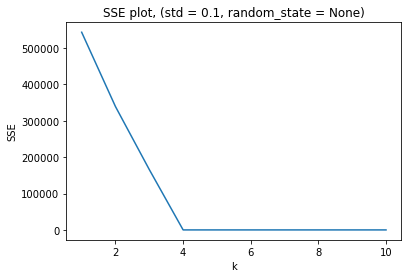

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


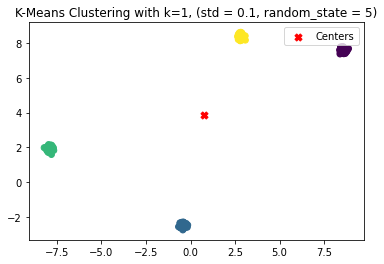

Contingency Table for k=1
[[75]
 [75]
 [75]
 [75]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


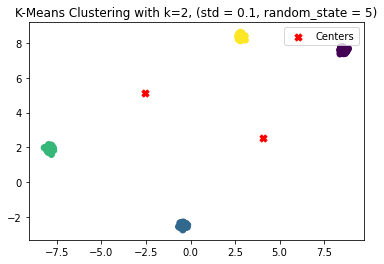

Contingency Table for k=2
[[75  0]
 [75  0]
 [ 0 75]
 [ 0 75]]


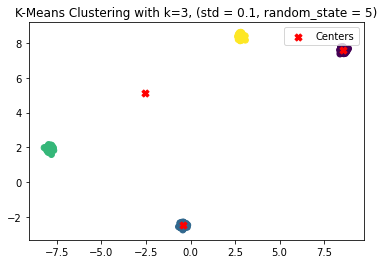

Contingency Table for k=3
[[ 0  0 75]
 [75  0  0]
 [ 0 75  0]
 [ 0 75  0]]


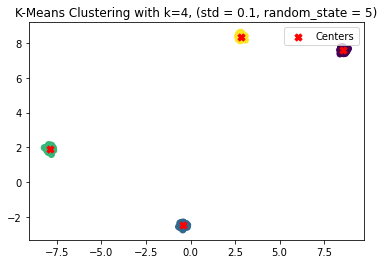

Contingency Table for k=4
[[ 0  0 75  0]
 [75  0  0  0]
 [ 0  0  0 75]
 [ 0 75  0  0]]


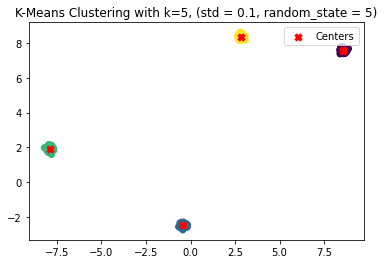

Contingency Table for k=5
[[ 0 40  0  0 35]
 [75  0  0  0  0]
 [ 0  0 75  0  0]
 [ 0  0  0 75  0]]


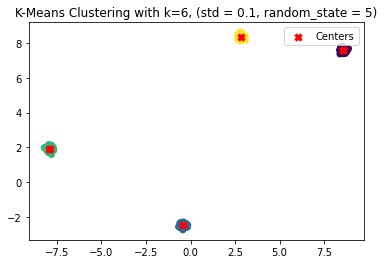

Contingency Table for k=6
[[ 0 24  0  0 51  0]
 [ 0  0 75  0  0  0]
 [29  0  0  0  0 46]
 [ 0  0  0 75  0  0]]


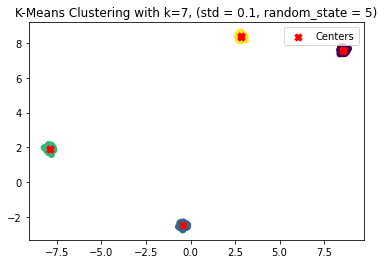

Contingency Table for k=7
[[ 0  0 21  0  0  0 54]
 [75  0  0  0  0  0  0]
 [ 0  0  0 38 37  0  0]
 [ 0 29  0  0  0 46  0]]


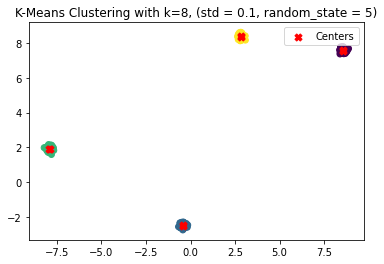

Contingency Table for k=8
[[37  0  0  0  0  0 38  0]
 [ 0  0 11  0  0 64  0  0]
 [ 0  0  0 52  0  0  0 23]
 [ 0 15  0  0 60  0  0  0]]


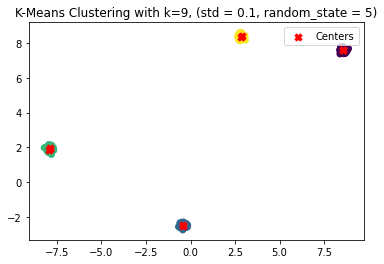

Contingency Table for k=9
[[ 0 50  0  0 25  0  0  0  0]
 [ 0  0 14  0  0  0  0 61  0]
 [ 0  0  0 28  0 19  0  0 28]
 [37  0  0  0  0  0 38  0  0]]


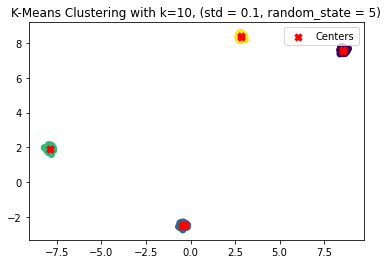

Contingency Table for k=10
[[ 0 13  0  0 31  0  0  0  0 31]
 [ 0  0 30  0  0  0  0 13 32  0]
 [ 0  0  0 47  0  0 28  0  0  0]
 [26  0  0  0  0 49  0  0  0  0]]


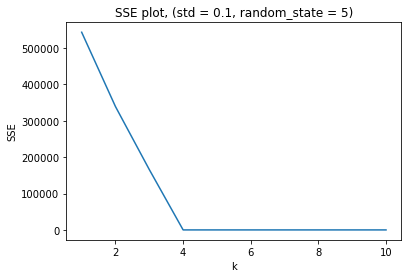

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


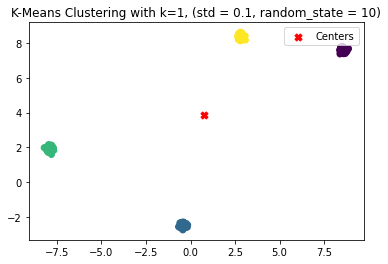

Contingency Table for k=1
[[75]
 [75]
 [75]
 [75]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


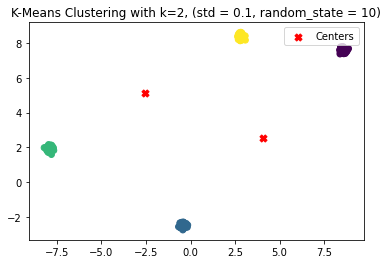

Contingency Table for k=2
[[ 0 75]
 [ 0 75]
 [75  0]
 [75  0]]


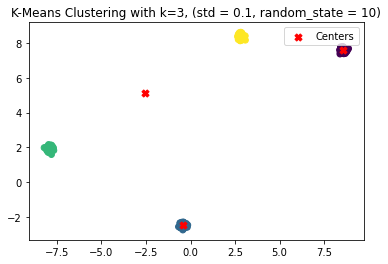

Contingency Table for k=3
[[ 0 75  0]
 [ 0  0 75]
 [75  0  0]
 [75  0  0]]


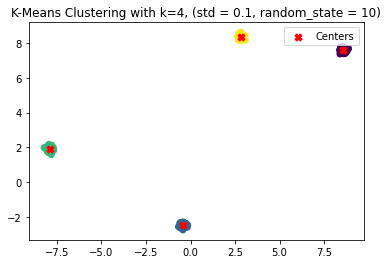

Contingency Table for k=4
[[ 0 75  0  0]
 [ 0  0 75  0]
 [75  0  0  0]
 [ 0  0  0 75]]


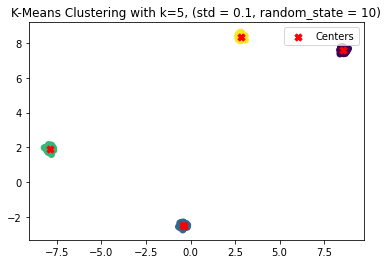

Contingency Table for k=5
[[ 0  0  0 75  0]
 [ 0 48  0  0 27]
 [75  0  0  0  0]
 [ 0  0 75  0  0]]


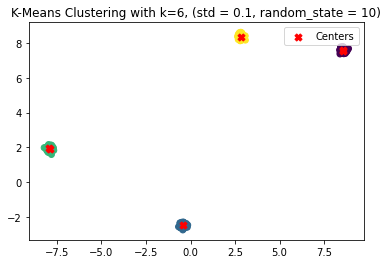

Contingency Table for k=6
[[43  0  0  0  0 32]
 [ 0  0 75  0  0  0]
 [ 0 36  0  0 39  0]
 [ 0  0  0 75  0  0]]


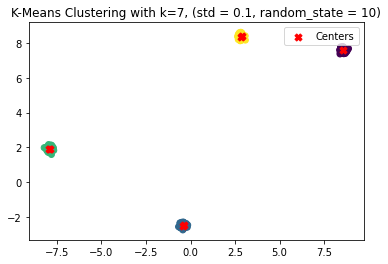

Contingency Table for k=7
[[ 0 75  0  0  0  0  0]
 [ 0  0  0 30 45  0  0]
 [ 0  0 40  0  0 35  0]
 [41  0  0  0  0  0 34]]


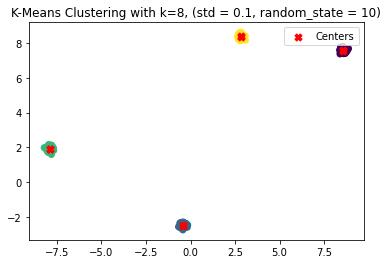

Contingency Table for k=8
[[ 0  0 35  0  0 40  0  0]
 [35  0  0  0 40  0  0  0]
 [ 0  0  0 46  0  0  0 29]
 [ 0  8  0  0  0  0 67  0]]


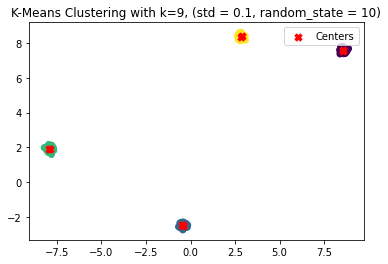

Contingency Table for k=9
[[ 0  0 32  0  0  0  0 43  0]
 [ 0  8  0  0  0 36  0  0 31]
 [ 0  0  0 47  0  0 28  0  0]
 [27  0  0  0 48  0  0  0  0]]


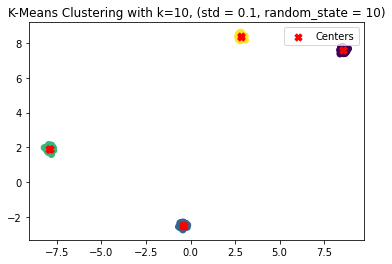

Contingency Table for k=10
[[ 0  0 34  0  0 41  0  0  0  0]
 [28  0  0  0  0  0 30  0 17  0]
 [ 0  0  0 20 33  0  0  0  0 22]
 [ 0 41  0  0  0  0  0 34  0  0]]


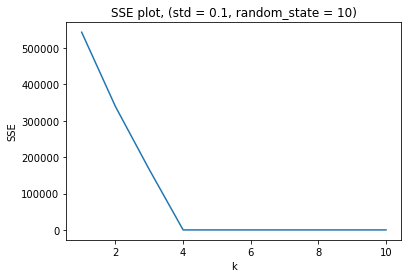

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


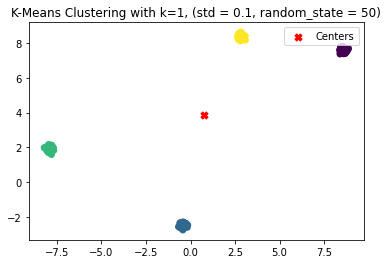

Contingency Table for k=1
[[75]
 [75]
 [75]
 [75]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


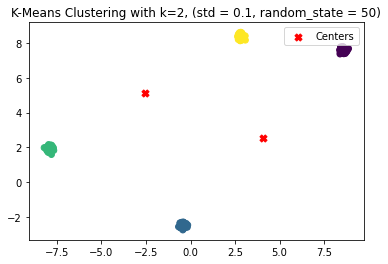

Contingency Table for k=2
[[75  0]
 [75  0]
 [ 0 75]
 [ 0 75]]


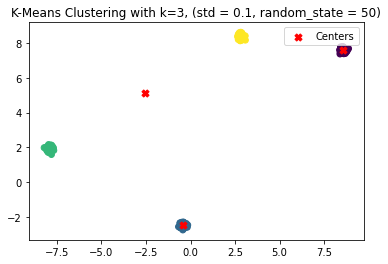

Contingency Table for k=3
[[ 0  0 75]
 [75  0  0]
 [ 0 75  0]
 [ 0 75  0]]


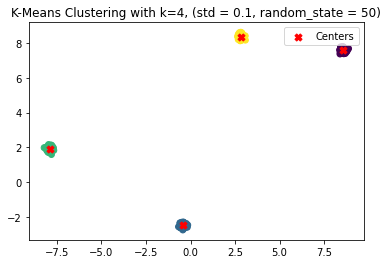

Contingency Table for k=4
[[ 0  0 75  0]
 [75  0  0  0]
 [ 0  0  0 75]
 [ 0 75  0  0]]


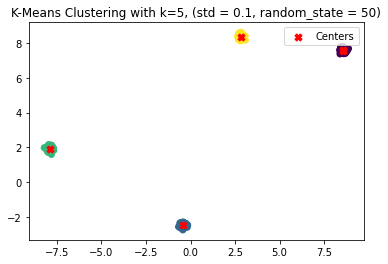

Contingency Table for k=5
[[ 0  0  0 31 44]
 [ 0 75  0  0  0]
 [ 0  0 75  0  0]
 [75  0  0  0  0]]


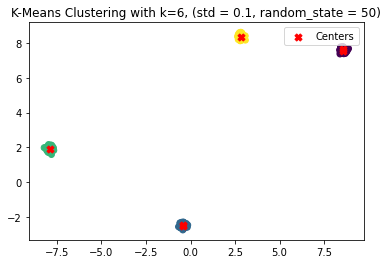

Contingency Table for k=6
[[ 0  0 35  0  0 40]
 [33  0  0  0 42  0]
 [ 0 75  0  0  0  0]
 [ 0  0  0 75  0  0]]


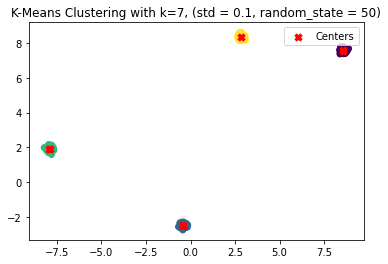

Contingency Table for k=7
[[31  0  0  0  0  0 44]
 [ 0  0 33  0  0 42  0]
 [ 0 34  0  0 41  0  0]
 [ 0  0  0 75  0  0  0]]


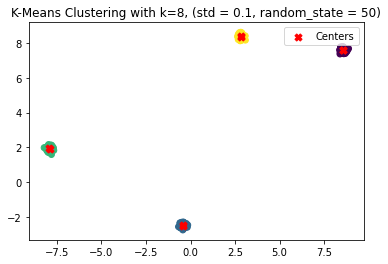

Contingency Table for k=8
[[ 0 16  0  0 59  0  0  0]
 [ 0  0 38  0  0 37  0  0]
 [39  0  0  0  0  0 36  0]
 [ 0  0  0 41  0  0  0 34]]


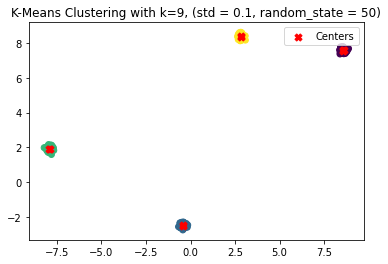

Contingency Table for k=9
[[ 0  0 20  0  0 38  0 17  0]
 [39  0  0  0  0  0 36  0  0]
 [ 0  0  0 45  0  0  0  0 30]
 [ 0 45  0  0 30  0  0  0  0]]


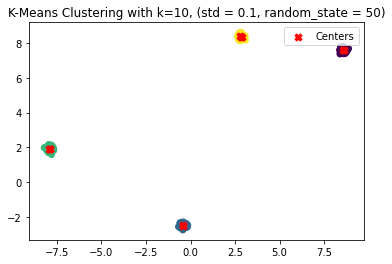

Contingency Table for k=10
[[26  0  0  0  0 49  0  0  0  0]
 [ 0  0 34  0  0  0 41  0  0  0]
 [ 0 15  0  0  0  0  0 29  0 31]
 [ 0  0  0 25 14  0  0  0 36  0]]


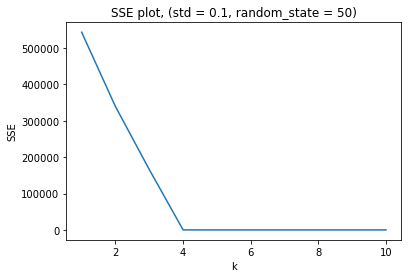

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


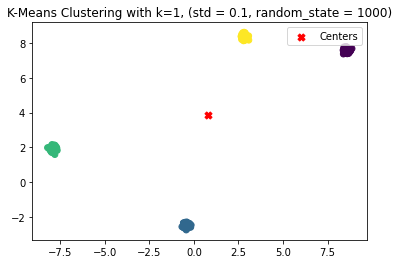

Contingency Table for k=1
[[75]
 [75]
 [75]
 [75]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


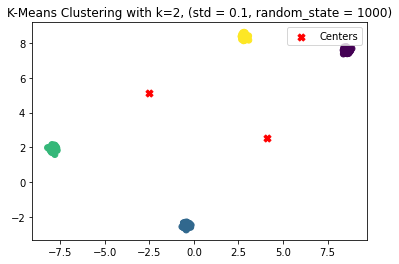

Contingency Table for k=2
[[75  0]
 [75  0]
 [ 0 75]
 [ 0 75]]


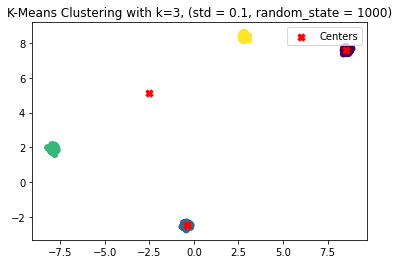

Contingency Table for k=3
[[75  0  0]
 [ 0  0 75]
 [ 0 75  0]
 [ 0 75  0]]


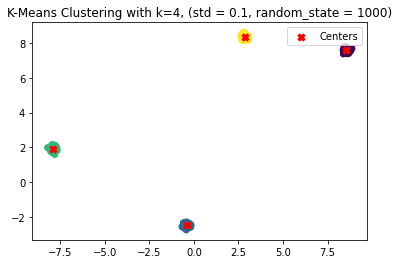

Contingency Table for k=4
[[75  0  0  0]
 [ 0  0 75  0]
 [ 0  0  0 75]
 [ 0 75  0  0]]


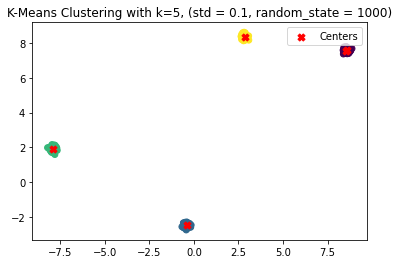

Contingency Table for k=5
[[ 0  0 27  0 48]
 [75  0  0  0  0]
 [ 0 75  0  0  0]
 [ 0  0  0 75  0]]


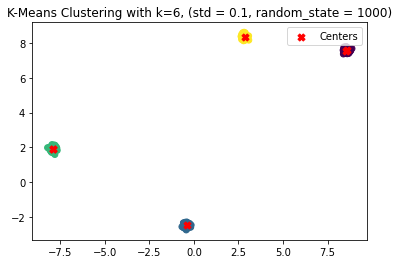

Contingency Table for k=6
[[ 0 37  0  0 38  0]
 [ 0  0 75  0  0  0]
 [25  0  0  0  0 50]
 [ 0  0  0 75  0  0]]


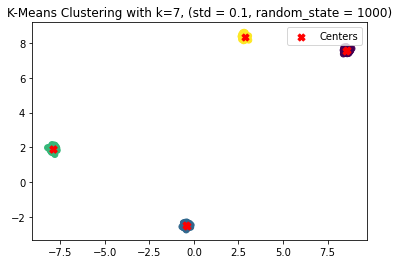

Contingency Table for k=7
[[ 0 45  0  0  0 30  0]
 [ 0  0 45  0 30  0  0]
 [ 0  0  0 38  0  0 37]
 [75  0  0  0  0  0  0]]


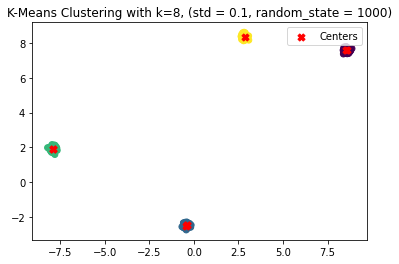

Contingency Table for k=8
[[37  0  0  0 38  0  0  0]
 [ 0  0 27  0  0 18  0 30]
 [ 0 24  0  0  0  0 51  0]
 [ 0  0  0 75  0  0  0  0]]


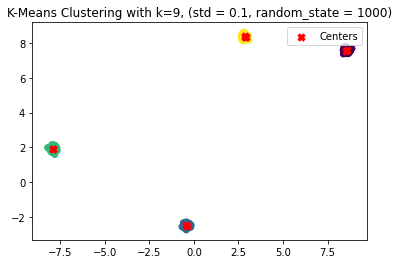

Contingency Table for k=9
[[42  0  0  0  0 33  0  0  0]
 [ 0  0 35  0  0  0  0 40  0]
 [ 0  0  0 52  0  0 23  0  0]
 [ 0  6  0  0 39  0  0  0 30]]


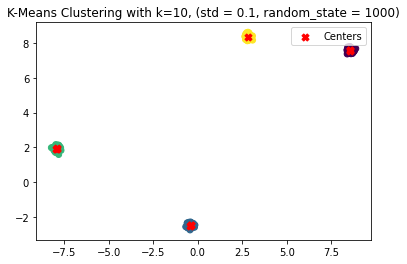

Contingency Table for k=10
[[32  0  0  0 31  0  0  0 12  0]
 [ 0  0 27  0  0 18  0 30  0  0]
 [ 0 14  0  0  0  0 35  0  0 26]
 [ 0  0  0 75  0  0  0  0  0  0]]


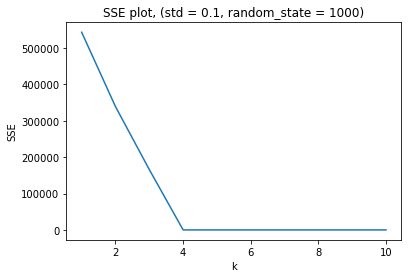

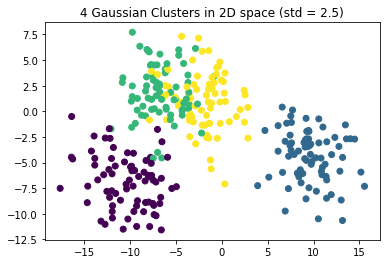

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


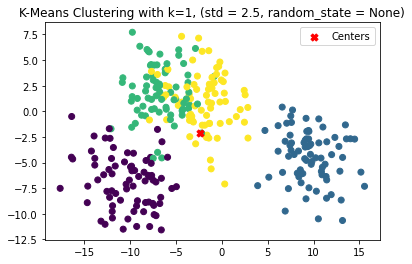

Contingency Table for k=1
[[75]
 [75]
 [75]
 [75]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


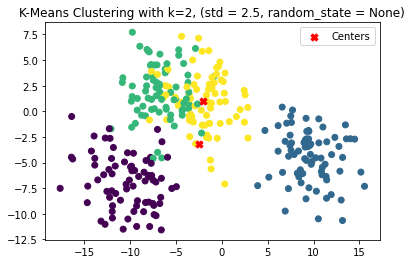

Contingency Table for k=2
[[75  0]
 [75  0]
 [75  0]
 [ 0 75]]


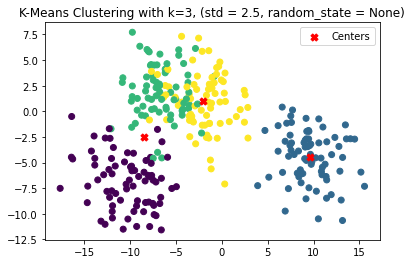

Contingency Table for k=3
[[75  0  0]
 [ 0  0 75]
 [75  0  0]
 [ 0 75  0]]


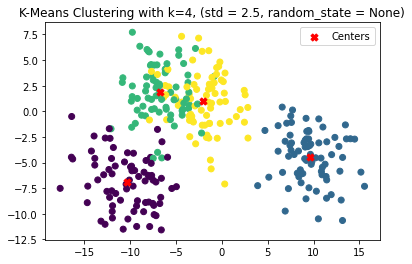

Contingency Table for k=4
[[ 0  0  0 75]
 [ 0  0 75  0]
 [75  0  0  0]
 [ 0 75  0  0]]


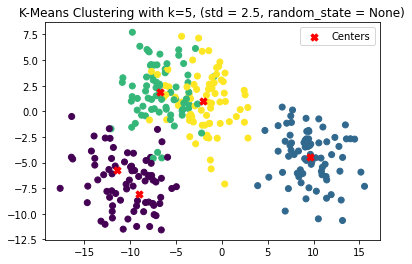

Contingency Table for k=5
[[ 0  0  0 40 35]
 [ 0 75  0  0  0]
 [75  0  0  0  0]
 [ 0  0 75  0  0]]


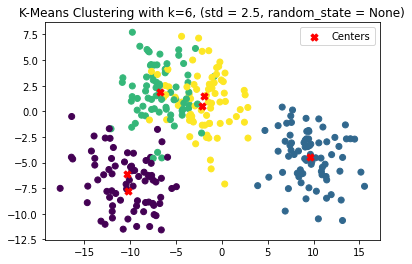

Contingency Table for k=6
[[40  0  0  0 35  0]
 [ 0  0 75  0  0  0]
 [ 0  0  0 75  0  0]
 [ 0 37  0  0  0 38]]


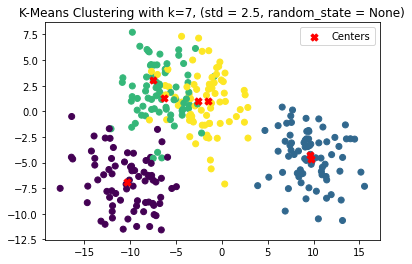

Contingency Table for k=7
[[ 0  0 75  0  0  0  0]
 [ 0 41  0  0  0 34  0]
 [ 0  0  0 24  0  0 51]
 [38  0  0  0 37  0  0]]


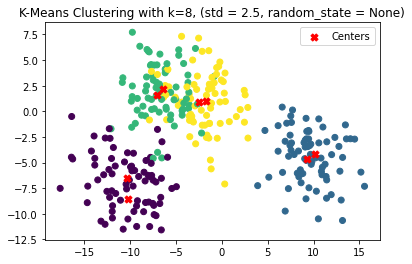

Contingency Table for k=8
[[ 0  0  0 63  0  0  0 12]
 [41  0  0  0  0  0 34  0]
 [ 0  0 39  0  0 36  0  0]
 [ 0 34  0  0 41  0  0  0]]


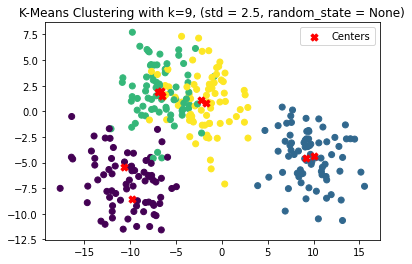

Contingency Table for k=9
[[40  0  0  0  0  0  0 35  0]
 [ 0  0 44  0  0  0 31  0  0]
 [ 0  0  0 14 38  0  0  0 23]
 [ 0 26  0  0  0 49  0  0  0]]


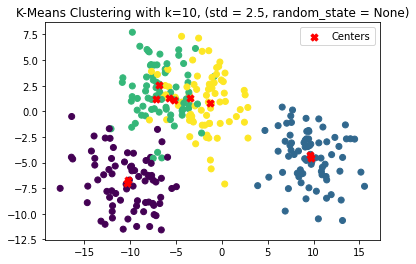

Contingency Table for k=10
[[ 0  0  0 35  0  0  0  0 40  0]
 [42  0  0  0  0  0 33  0  0  0]
 [ 0  5  0  0 11 37  0  0  0 22]
 [ 0  0 48  0  0  0  0 27  0  0]]


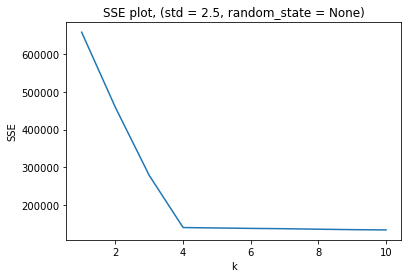

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


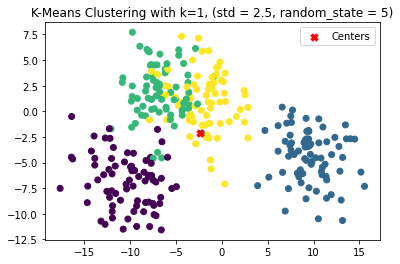

Contingency Table for k=1
[[75]
 [75]
 [75]
 [75]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


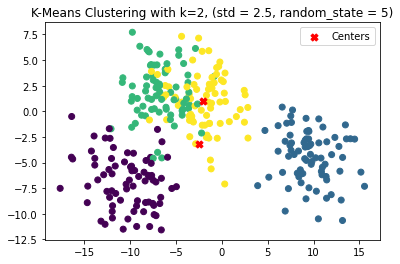

Contingency Table for k=2
[[ 0 75]
 [ 0 75]
 [ 0 75]
 [75  0]]


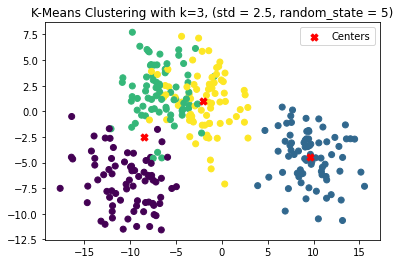

Contingency Table for k=3
[[ 0 75  0]
 [75  0  0]
 [ 0 75  0]
 [ 0  0 75]]


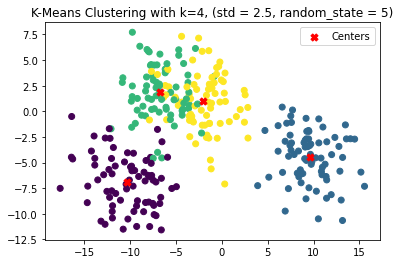

Contingency Table for k=4
[[ 0  0  0 75]
 [75  0  0  0]
 [ 0 75  0  0]
 [ 0  0 75  0]]


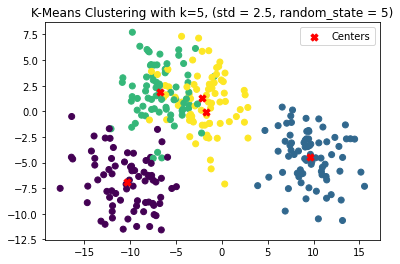

Contingency Table for k=5
[[ 0 75  0  0  0]
 [ 0  0  0 75  0]
 [75  0  0  0  0]
 [ 0  0 18  0 57]]


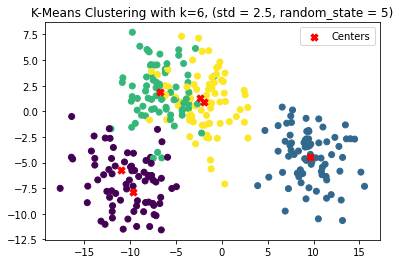

Contingency Table for k=6
[[39  0  0  0 36  0]
 [ 0  0  0 75  0  0]
 [ 0  0 75  0  0  0]
 [ 0 53  0  0  0 22]]


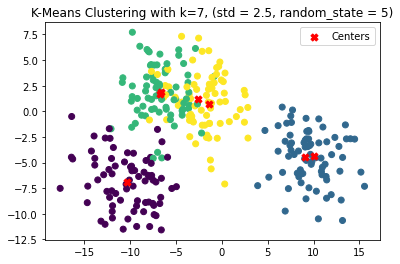

Contingency Table for k=7
[[ 0  0  0 75  0  0  0]
 [ 0 43  0  0 32  0  0]
 [52  0  0  0  0 23  0]
 [ 0  0 41  0  0  0 34]]


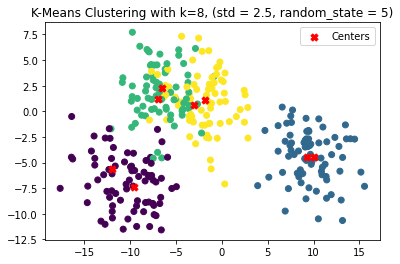

Contingency Table for k=8
[[ 0  0  0 52 23  0  0  0]
 [ 0  0 42  0  0  0 33  0]
 [31  0  0  0  0 44  0  0]
 [ 0 59  0  0  0  0  0 16]]


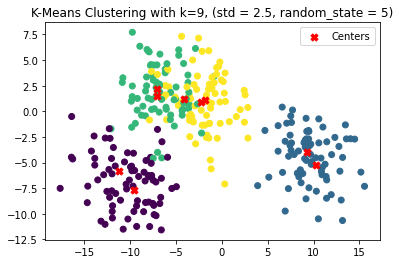

Contingency Table for k=9
[[41  0  0  0 34  0  0  0  0]
 [ 0  0 28  0  0  0  0  0 47]
 [ 0  9  0  0  0 24  0 42  0]
 [ 0  0  0 39  0  0 36  0  0]]


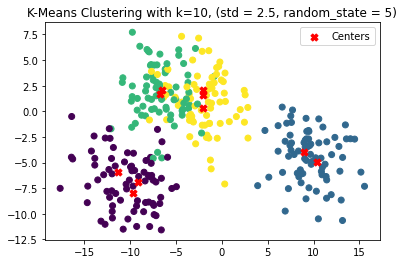

Contingency Table for k=10
[[ 0  0  0 33  0  0  0 28 14  0]
 [ 0  0 39  0 36  0  0  0  0  0]
 [29  0  0  0  0  0 46  0  0  0]
 [ 0 23  0  0  0 12  0  0  0 40]]


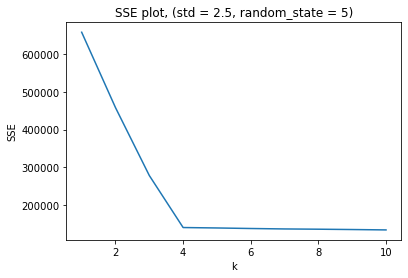

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


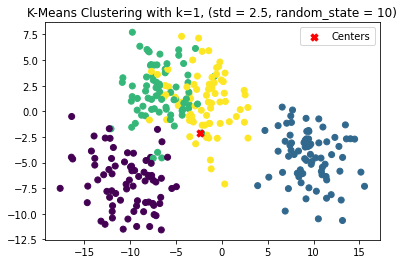

Contingency Table for k=1
[[75]
 [75]
 [75]
 [75]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


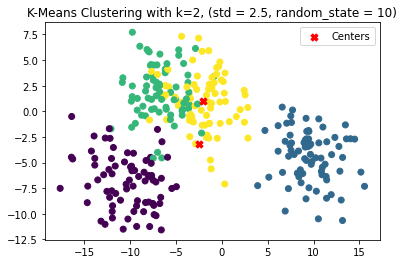

Contingency Table for k=2
[[75  0]
 [75  0]
 [75  0]
 [ 0 75]]


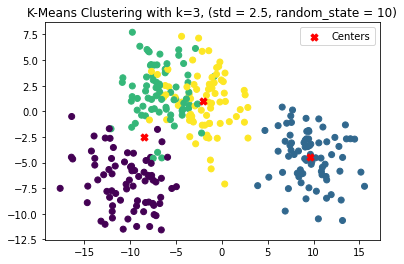

Contingency Table for k=3
[[75  0  0]
 [ 0 75  0]
 [75  0  0]
 [ 0  0 75]]


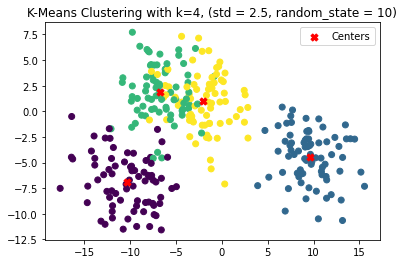

Contingency Table for k=4
[[75  0  0  0]
 [ 0 75  0  0]
 [ 0  0  0 75]
 [ 0  0 75  0]]


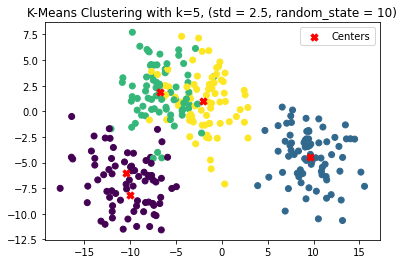

Contingency Table for k=5
[[ 0 29  0  0 46]
 [ 0  0 75  0  0]
 [ 0  0  0 75  0]
 [75  0  0  0  0]]


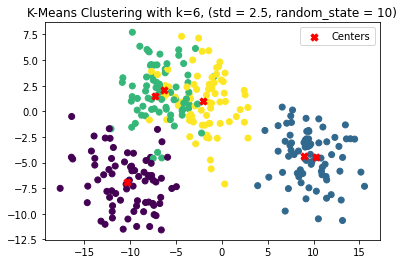

Contingency Table for k=6
[[75  0  0  0  0  0]
 [ 0  0 34  0 41  0]
 [ 0  0  0 30  0 45]
 [ 0 75  0  0  0  0]]


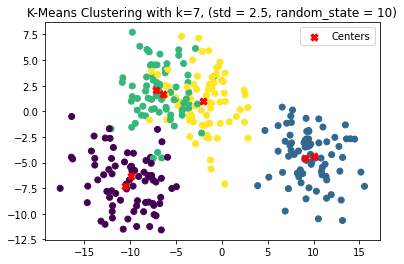

Contingency Table for k=7
[[32  0  0  0  0  0 43]
 [ 0 43  0  0  0 32  0]
 [ 0  0  0 28 47  0  0]
 [ 0  0 75  0  0  0  0]]


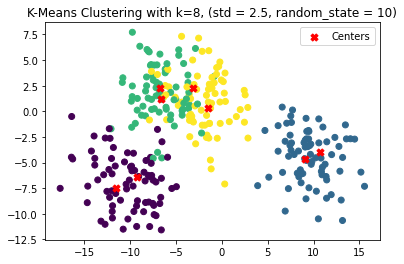

Contingency Table for k=8
[[ 0  0  0 42  0  0 33  0]
 [26  0  0  0 49  0  0  0]
 [ 0  0 45  0  0 30  0  0]
 [ 0 50  0  0  0  0  0 25]]


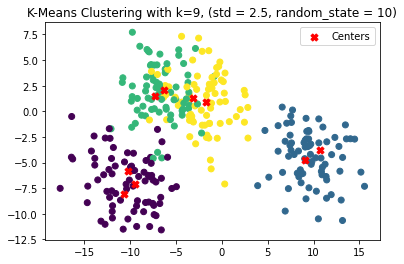

Contingency Table for k=9
[[ 0  9  0  0  0 29  0  0 37]
 [25  0  0  0  0  0 50  0  0]
 [ 0  0  0 45  0  0  0 30  0]
 [ 0  0 18  0 57  0  0  0  0]]


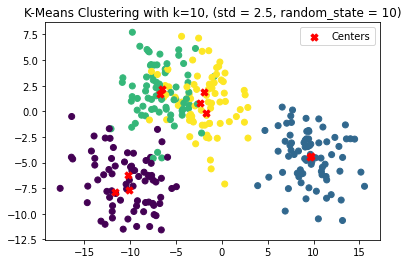

Contingency Table for k=10
[[ 0  5  0  0  0 42 28  0  0  0]
 [ 0  0 27  0  0  0  0  0 48  0]
 [ 0  0  0 46  0  0  0  0  0 29]
 [20  0  0  0 29  0  0 26  0  0]]


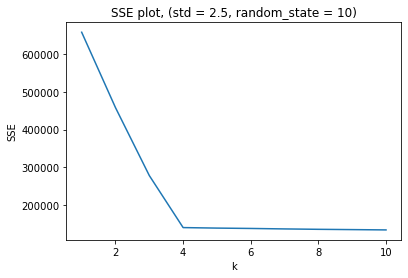

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


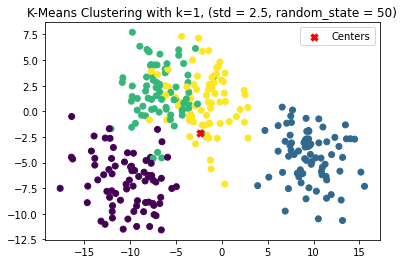

Contingency Table for k=1
[[75]
 [75]
 [75]
 [75]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


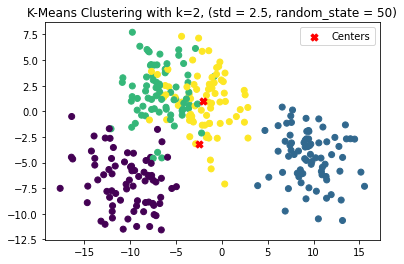

Contingency Table for k=2
[[ 0 75]
 [ 0 75]
 [ 0 75]
 [75  0]]


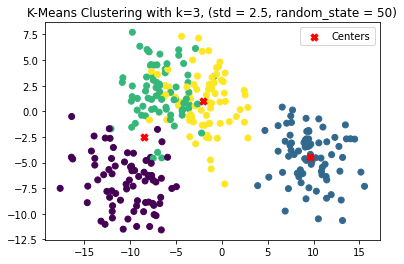

Contingency Table for k=3
[[75  0  0]
 [ 0  0 75]
 [75  0  0]
 [ 0 75  0]]


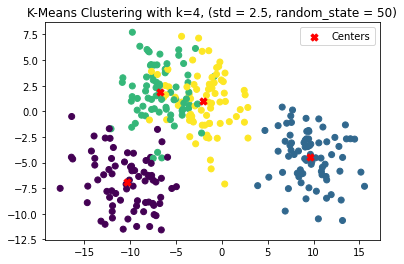

Contingency Table for k=4
[[ 0  0 75  0]
 [ 0 75  0  0]
 [75  0  0  0]
 [ 0  0  0 75]]


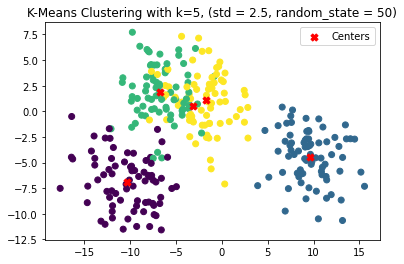

Contingency Table for k=5
[[ 0  0  0 75  0]
 [75  0  0  0  0]
 [ 0 75  0  0  0]
 [ 0  0 16  0 59]]


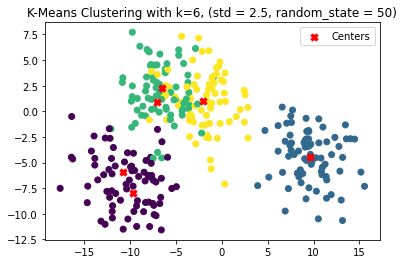

Contingency Table for k=6
[[41  0  0  0  0 34]
 [ 0  0 75  0  0  0]
 [ 0  0  0 54 21  0]
 [ 0 75  0  0  0  0]]


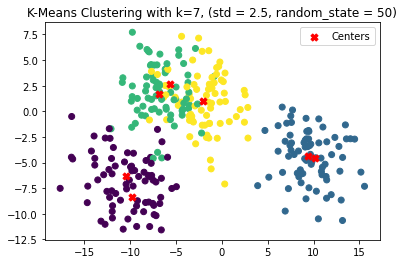

Contingency Table for k=7
[[ 0  0 55  0  0  0 20]
 [ 0 29  0  0  0 46  0]
 [63  0  0  0 12  0  0]
 [ 0  0  0 75  0  0  0]]


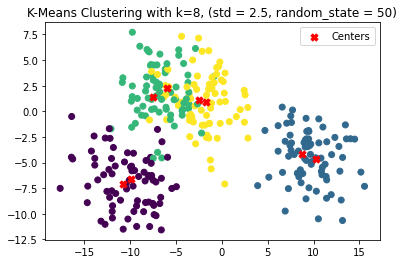

Contingency Table for k=8
[[ 0 35  0  0 40  0  0  0]
 [ 0  0 47  0  0  0  0 28]
 [ 0  0  0 33  0 42  0  0]
 [43  0  0  0  0  0 32  0]]


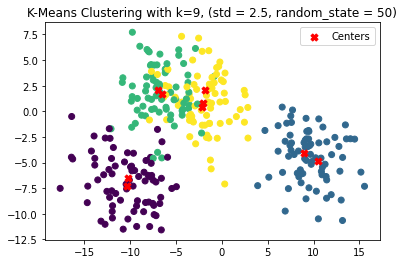

Contingency Table for k=9
[[ 0 34  0  0 41  0  0  0  0]
 [ 0  0  0 41  0  0  0  0 34]
 [ 0  0 39  0  0 36  0  0  0]
 [18  0  0  0  0  0 28 29  0]]


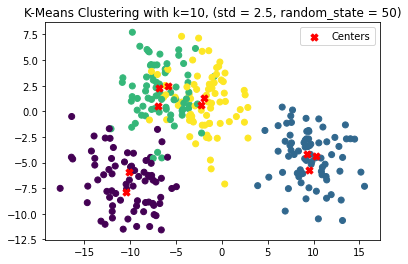

Contingency Table for k=10
[[ 0 36  0  0 39  0  0  0  0  0]
 [ 0  0  0 10  0  0 25 40  0  0]
 [12  0  0  0  0 45  0  0  0 18]
 [ 0  0 41  0  0  0  0  0 34  0]]


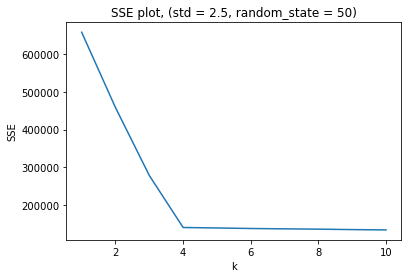

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


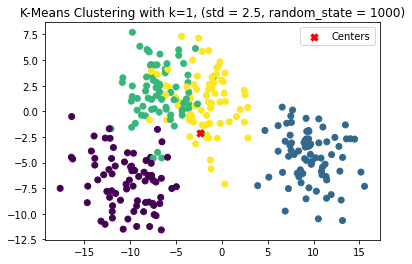

Contingency Table for k=1
[[75]
 [75]
 [75]
 [75]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


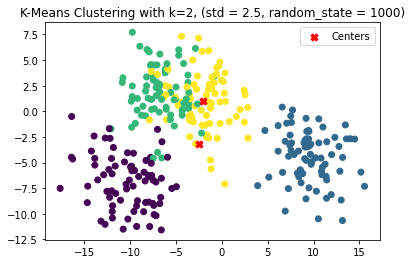

Contingency Table for k=2
[[ 0 75]
 [ 0 75]
 [ 0 75]
 [75  0]]


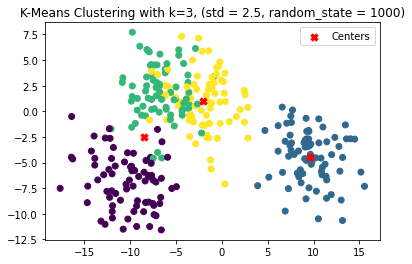

Contingency Table for k=3
[[ 0 75  0]
 [75  0  0]
 [ 0 75  0]
 [ 0  0 75]]


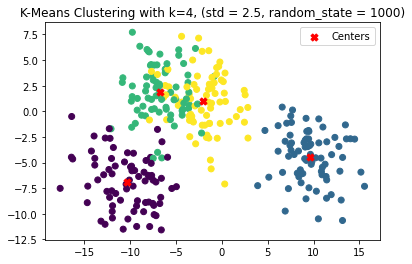

Contingency Table for k=4
[[ 0 75  0  0]
 [75  0  0  0]
 [ 0  0  0 75]
 [ 0  0 75  0]]


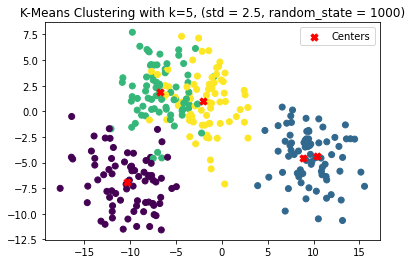

Contingency Table for k=5
[[75  0  0  0  0]
 [ 0  0  0 38 37]
 [ 0  0 75  0  0]
 [ 0 75  0  0  0]]


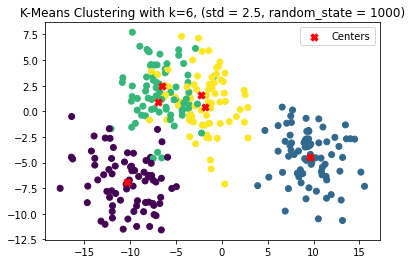

Contingency Table for k=6
[[ 0  0  0 75  0  0]
 [75  0  0  0  0  0]
 [ 0 27  0  0  0 48]
 [ 0  0 37  0 38  0]]


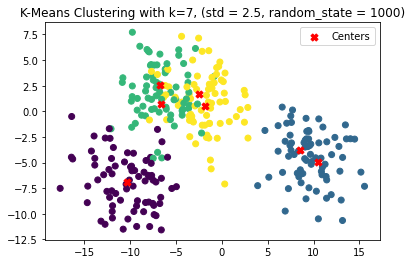

Contingency Table for k=7
[[ 0  0 75  0  0  0  0]
 [31  0  0  0  0  0 44]
 [ 0 29  0  0 46  0  0]
 [ 0  0  0 45  0 30  0]]


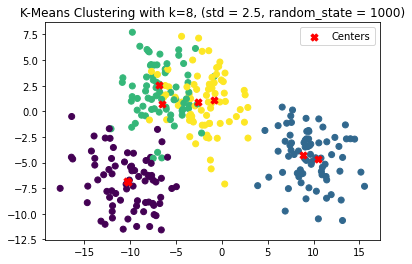

Contingency Table for k=8
[[ 0  0  0 50  0  0  0 25]
 [36  0  0  0 39  0  0  0]
 [ 0 29  0  0  0 46  0  0]
 [ 0  0 53  0  0  0 22  0]]


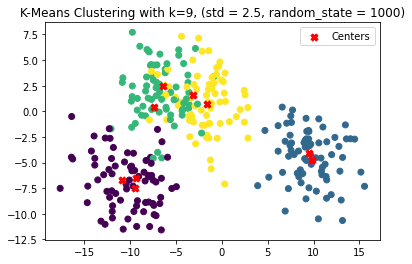

Contingency Table for k=9
[[ 0 20  0  0 44  0  0 11  0]
 [ 0  0  0 32  0 43  0  0  0]
 [ 0  0 53  0  0  0  0  0 22]
 [23  0  0  0  0  0 52  0  0]]


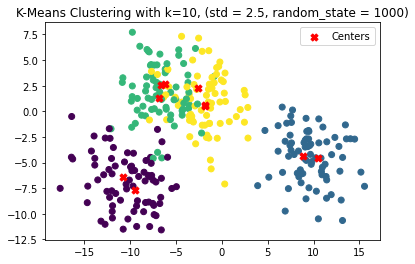

Contingency Table for k=10
[[ 0  0  0 49  0 26  0  0  0  0]
 [ 0  0 38  0  0  0  0  0 37  0]
 [11  0  0  0 21  0 43  0  0  0]
 [ 0 18  0  0  0  0  0 29  0 28]]


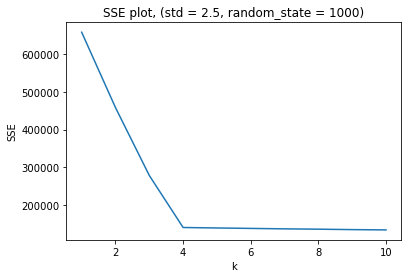

In [29]:
std = [0.1, 2.5]
K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cci = [None, 5, 10, 50, 1000] #cluster_center initialization = random state

for s in std:
    X, y = generate_clusters(s)
    plot_clusters(X, y, f'4 Gaussian Clusters in 2D space (std = {s})')
    
    
    for rs in cci:

        sse = []
        for k in K:
            kmeans_clustering(X, y, k, f'K-Means Clustering with k={k}, (std = {s}, random_state = {rs})',random_state = rs)
            kmeans = KMeans(n_clusters = k, random_state = rs)
            Ypred = kmeans.fit(X)
            sse.append(Ypred.inertia_)

        plot_sse(range(1,11), sse, f'SSE plot, (std = {s}, random_state = {rs})')


    

To answer the question : _Do the plots indicate that the natural number of clusters is 4?_  
The answer is **yes**  
Elbow Method clearly shows that 4 is the correct number of clusters in eacg of the plots (which btw look identical)

To answer the question: _Do you receive clustering solutions similar to those obtained for 
random_state=None? Can you explain why?_  
The answer is: see images and analytical report

To answer the question : _Can you propose an extension of the k-means initialization that is less 
dependent on random_state; i.e. it results in similar clustering solutions?_  
The answer is: ?

STILL NEED TO INTERPRET EVERYTHING


# Assignment 2

In [13]:
#load and print vertebrate.csv
vertebrate = r"C:\Users\jules\OneDrive\Documents\Maastricht (DSDM)\Master\Year 1\Sept-Jan\KEN4113 DM\LAB4\vertebrate.csv"

vert = pd.read_csv(vertebrate)
vert

Name  Warm-blooded  Gives Birth  Aquatic Creature  \
0           human             1            1                 0   
1          python             0            0                 0   
2          salmon             0            0                 1   
3           whale             1            1                 1   
4            frog             0            0                 1   
5          komodo             0            0                 0   
6             bat             1            1                 0   
7          pigeon             1            0                 0   
8             cat             1            1                 0   
9   leopard shark             0            1                 1   
10         turtle             0            0                 1   
11        penguin             1            0                 1   
12      porcupine             1            1                 0   
13            eel             0            0                 1   
14     salamander             0            0                 1   

    Aerial Creature  Has Legs  Hibernates       Class  
0                 0         1           0     mammals  
1                 0         0           1    reptiles  
2                 0         0           0      fishes  
3                 0         0           0     mammals  
4                 0         1           1  amphibians  
5                 0         1           0    reptiles  
6                 1         1           1     mammals  
7                 1         1           0       birds  
8                 0         1           0     mammals  
9                 0         0           0      fishes  
10                0         1           0    reptiles  
11                0         1           0       birds  
12                0         1           1     mammals  
13                0         0           0      fishes  
14                0         1           1  amphibians

## Not Including Class

In [14]:
features = vert.columns[1:-1] #only take features into account, not name nor class
X = vert[features].values

X #--> Now looks like an array

array([[1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 1, 1],
       [1, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 1]], dtype=int64)

### Single-Link 

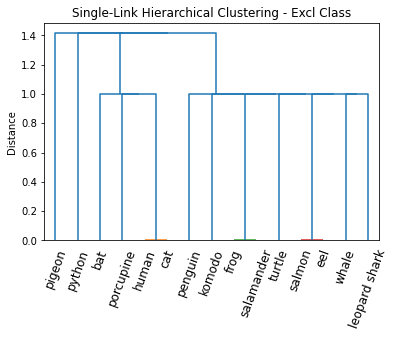

In [15]:
SL = linkage(X, 'single')
dn = dendrogram(SL, labels=vert['Name'].values) #display ames instead of numbers on x axis
plt.title('Single-Link Hierarchical Clustering - Excl Class')
plt.xticks(rotation = 70)#rotate for better visibility
plt.ylabel('Distance')
plt.savefig('Single-Link Hierarchical Clustering - Excl Class')

plt.show()

### Max-Link

**max-link = complete-link**

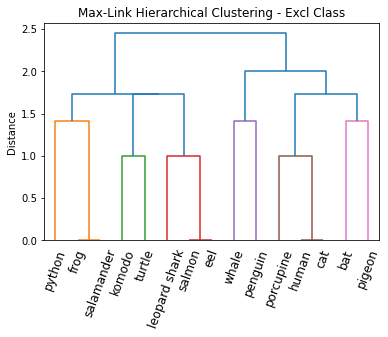

In [16]:
#repeat with 'complete' method
ML = linkage(X, 'complete')
dn = dendrogram(ML, labels=vert['Name'].values) #display ames instead of numbers on x axis
plt.title('Max-Link Hierarchical Clustering - Excl Class')
plt.xticks(rotation = 70)#rotate for better visibility
plt.ylabel('Distance')
plt.savefig('Max-Link Hierarchical Clustering - Excl Class')

plt.show()

### Average-link

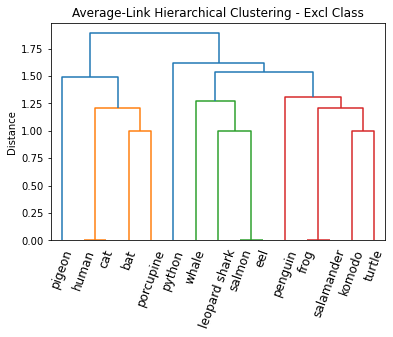

In [17]:
#repeat with 'average' method
AL = linkage(X, 'average')
dn = dendrogram(AL, labels=vert['Name'].values) #display ames instead of numbers on x axis
plt.title('Average-Link Hierarchical Clustering - Excl Class')
plt.xticks(rotation = 70)#rotate for better visibility
plt.ylabel('Distance')
plt.savefig('Average-Link Hierarchical Clustering - Excl Class')

plt.show()

## Including class

In [18]:
#let's create a dictionnary to include the class
class_dict = {
    'mammals' : 0,
    'reptiles' : 1,
    'birds' : 2,
    'fishes' : 3, 
    'amphibians' : 4
}

In [19]:
#load and print vertebrate.csv
vertebrate = r"C:\Users\jules\OneDrive\Documents\Maastricht (DSDM)\Master\Year 1\Sept-Jan\KEN4113 DM\LAB4\vertebrate.csv"

vert = pd.read_csv(vertebrate)

#change DF with values: 
vert['Class_Orig'] = vert['Class'].map(class_dict)

#swap values so that it is easier to deal with later: 
vert['Class_Orig'], vert['Class'] = vert['Class'].copy(), vert['Class_Orig'].copy()



vert

Name  Warm-blooded  Gives Birth  Aquatic Creature  \
0           human             1            1                 0   
1          python             0            0                 0   
2          salmon             0            0                 1   
3           whale             1            1                 1   
4            frog             0            0                 1   
5          komodo             0            0                 0   
6             bat             1            1                 0   
7          pigeon             1            0                 0   
8             cat             1            1                 0   
9   leopard shark             0            1                 1   
10         turtle             0            0                 1   
11        penguin             1            0                 1   
12      porcupine             1            1                 0   
13            eel             0            0                 1   
14     salamander             0            0                 1   

    Aerial Creature  Has Legs  Hibernates  Class  Class_Orig  
0                 0         1           0      0     mammals  
1                 0         0           1      1    reptiles  
2                 0         0           0      3      fishes  
3                 0         0           0      0     mammals  
4                 0         1           1      4  amphibians  
5                 0         1           0      1    reptiles  
6                 1         1           1      0     mammals  
7                 1         1           0      2       birds  
8                 0         1           0      0     mammals  
9                 0         0           0      3      fishes  
10                0         1           0      1    reptiles  
11                0         1           0      2       birds  
12                0         1           1      0     mammals  
13                0         0           0      3      fishes  
14                0         1           1      4  amphibians

#### Run Different Hierarchical Clustering

In [20]:
features = vert.columns[1:-1] #only take features into account, not name nor class
X = vert[features].values

X #--> Now looks like an array

array([[1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 3],
       [1, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 4],
       [0, 0, 0, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 2],
       [1, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 3],
       [0, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 2],
       [1, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 3],
       [0, 0, 1, 0, 1, 1, 4]], dtype=int64)

### Single-Link 

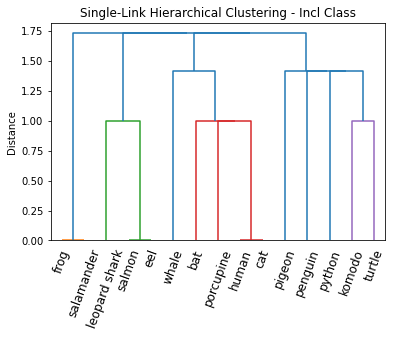

In [21]:
SL = linkage(X, 'single')
dn = dendrogram(SL, labels=vert['Name'].values) #display ames instead of numbers on x axis
plt.title('Single-Link Hierarchical Clustering - Incl Class')
plt.xticks(rotation = 70)#rotate for better visibility
plt.ylabel('Distance')
plt.savefig('Single-Link Hierarchical Clustering - Incl Class')

plt.show()

### Max-Link

**max-link = complete-link**

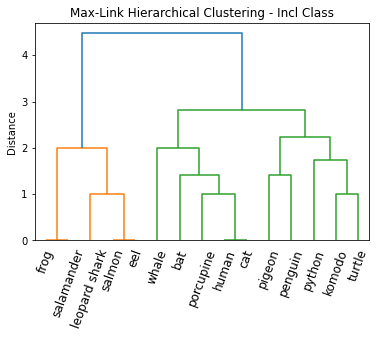

In [22]:
#repeat with 'complete' method
ML = linkage(X, 'complete')
dn = dendrogram(ML, labels=vert['Name'].values) #display ames instead of numbers on x axis
plt.title('Max-Link Hierarchical Clustering - Incl Class')
plt.xticks(rotation = 70)#rotate for better visibility
plt.ylabel('Distance')
plt.savefig('Max-Link Hierarchical Clustering - Incl Class')

plt.show()

### Average-link

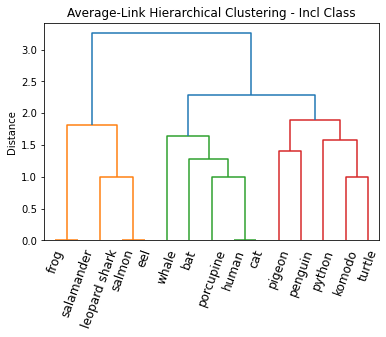

In [23]:
#repeat with 'average' method
AL = linkage(X, 'average')
dn = dendrogram(AL, labels=vert['Name'].values) #display ames instead of numbers on x axis
plt.title('Average-Link Hierarchical Clustering - Incl Class')
plt.xticks(rotation = 70)#rotate for better visibility
plt.ylabel('Distance')
plt.savefig('Average-Link Hierarchical Clustering - Incl Class')

plt.show()

It looks like there is an improvement when Including the class parameter but maybe the order in which we defined the class would change the results?

# Assignment3

In [24]:
chameleon = r"C:\Users\jules\OneDrive\Documents\Maastricht (DSDM)\Master\Year 1\Sept-Jan\KEN4113 DM\LAB4\chameleon.csv"

cham = pd.read_csv(chameleon)
cham

x        y
0     650.914  214.888
1      41.767  179.408
2     509.126  233.749
3     486.403  152.427
4      46.883  367.904
...       ...      ...
1966  631.430  210.478
1967  187.652  247.923
1968  124.996  264.847
1969  522.511  302.785
1970  350.695  269.386

[1971 rows x 2 columns]

## DBSCAN with eps = 15.5 and min_samples = 5

In [25]:
eps = 15.5
min_samples = 5

clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(cham)

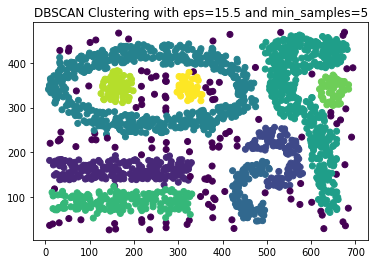

In [26]:
#let's visualize them for betetr interpretation
x = cham['x']
y = cham['y']

plt.scatter(x, y, c=clustering.labels_ ,cmap = 'viridis')
plt.title('DBSCAN Clustering with eps=15.5 and min_samples=5')
plt.savefig('DBSCAN Clustering with eps=15.5 and min_samples=5.png')

plt.show()

## DBSCAN with different eps and min_samples

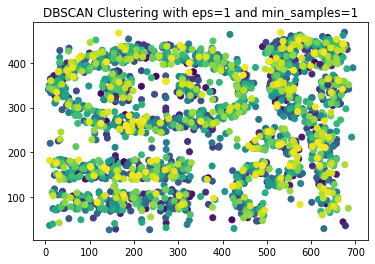

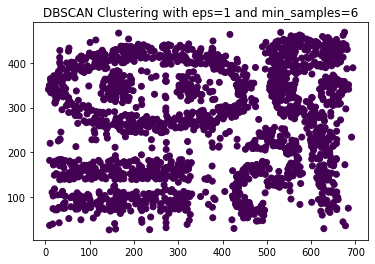

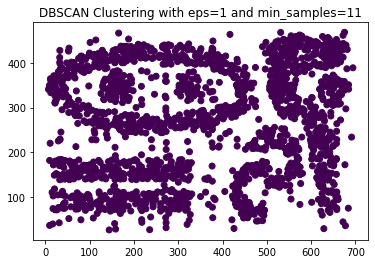

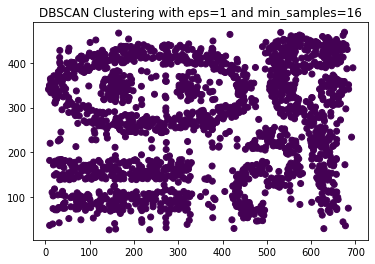

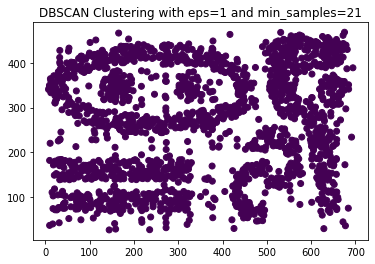

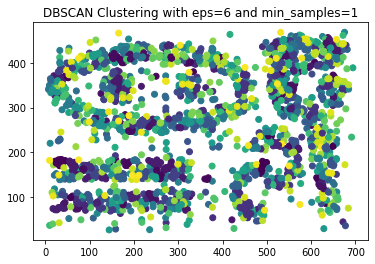

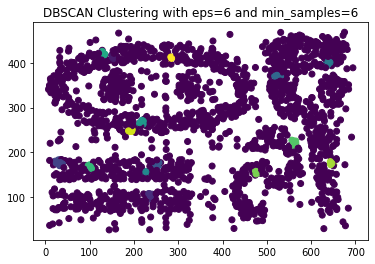

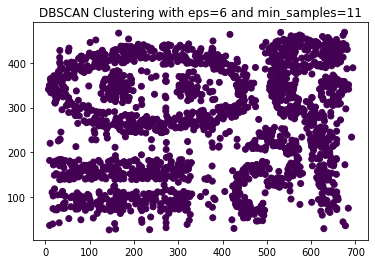

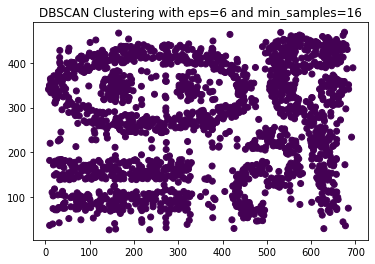

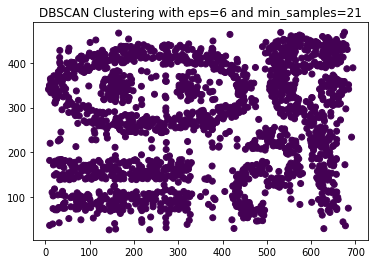

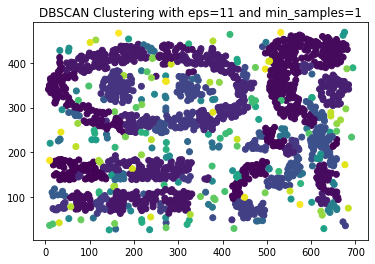

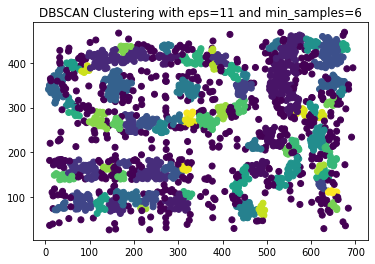

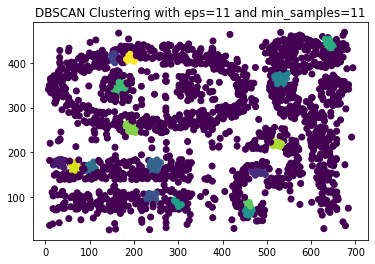

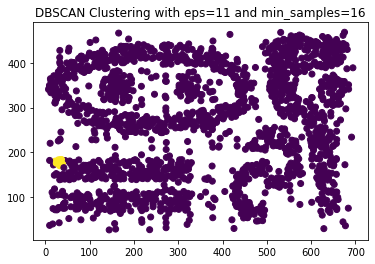

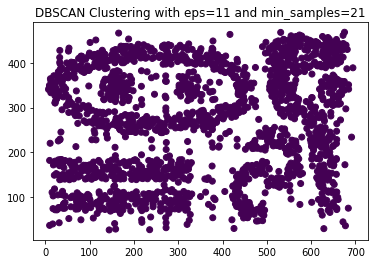

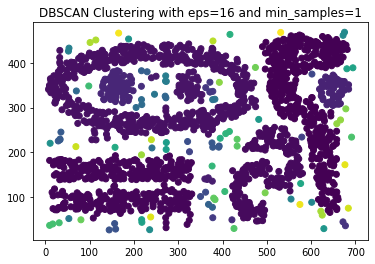

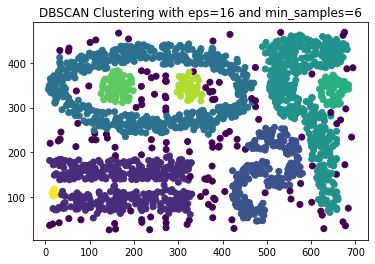

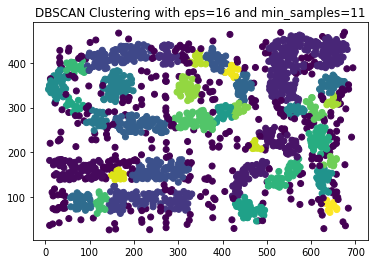

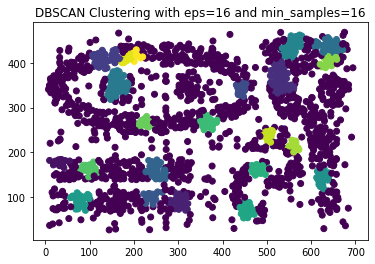

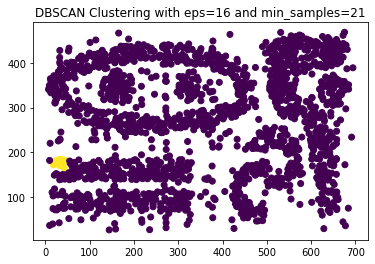

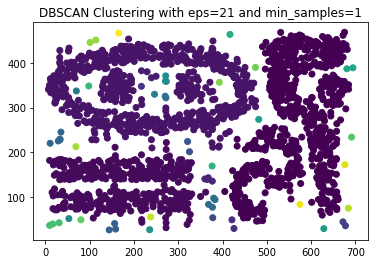

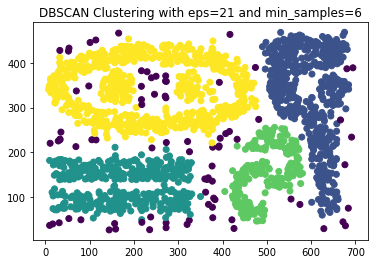

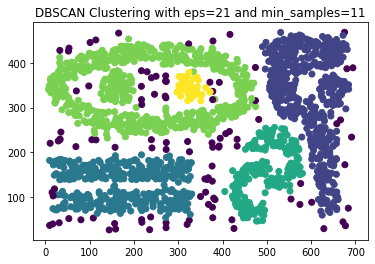

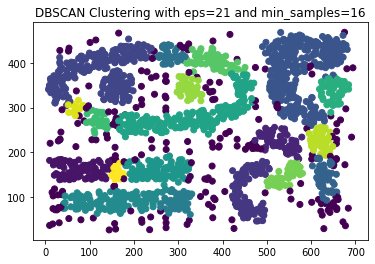

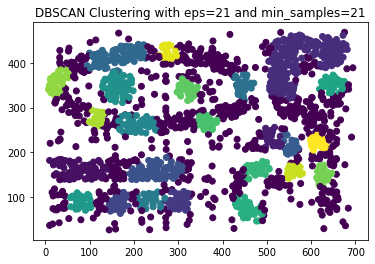

In [27]:
steps = 5
eps_val = range(1, 22, steps)
min_samples_val = range(1, 22, steps)

for eps in eps_val:
    for min_samples in min_samples_val:
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(cham) 
        plt.scatter(x, y, c=clustering.labels_ ,cmap = 'viridis')
        plt.title(f'DBSCAN Clustering with eps={eps} and min_samples={min_samples}')
        plt.savefig(f'DBSCAN Clustering with eps={eps} and min_samples={min_samples}')
        
        plt.show()